In [1]:
!pip install --upgrade pip
!pip install imblearn

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 3.1 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: pip
    Found existing installation: pip 22.1.2
    Uninstalling pip-22.1.2:
      Successfully uninstalled pip-22.1.2
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 2.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 5.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.8/24.8 MB 1.2 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: joblib
    Found existing installation: joblib 0.14.1
    Uninstalling joblib-0.14.1:
      Successfully uninstalled joblib-0.14.1
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.2
    Uninstalling scikit-learn-0.24.2:
      Successfully uninstalled scikit-learn-0.24.2


In [2]:
!pip install Scikit-learn

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


In [3]:
!pip install Matplotlib

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


In [4]:
!pip install scikit-plot

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


In [5]:
import pandas as pd
import numpy
import seaborn
import sklearn

import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 10, 8

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing 
from sklearn.linear_model import LogisticRegression  #l逻辑回归
from sklearn.ensemble import RandomForestClassifier   #随机森林
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
from sklearn import metrics 
import scikitplot 
#Hide all the warnings in jupyter notebook
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_recall_fscore_support
from sklearn.metrics import f1_score,roc_auc_score
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from xgboost import plot_importance

In [4]:
# 解压数据
!unzip /home/aistudio/data/data190996/MachineLearningCSV.zip -d ./data58344/
!unzip /home/aistudio/data/data190996/GeneratedLabelledFlows.zip -d ./data/

Archive:  /home/aistudio/data/data190996/MachineLearningCSV.zip
   creating: ./data58344/MachineLearningCVE/
  inflating: ./data58344/MachineLearningCVE/Wednesday-workingHours.pcap_ISCX.csv  
  inflating: ./data58344/MachineLearningCVE/Tuesday-WorkingHours.pcap_ISCX.csv  
  inflating: ./data58344/MachineLearningCVE/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv  
  inflating: ./data58344/MachineLearningCVE/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv  
  inflating: ./data58344/MachineLearningCVE/Monday-WorkingHours.pcap_ISCX.csv  
  inflating: ./data58344/MachineLearningCVE/Friday-WorkingHours-Morning.pcap_ISCX.csv  
  inflating: ./data58344/MachineLearningCVE/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv  
  inflating: ./data58344/MachineLearningCVE/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv  
Archive:  /home/aistudio/data/data190996/GeneratedLabelledFlows.zip
   creating: ./data/TrafficLabelling /
  inflating: ./data/TrafficLabelling /Wednesday-wor

In [5]:
# 合并数据集
'''
data0 = pd.read_csv('data58344/MachineLearningCVE/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv',  low_memory = False)
data1 = pd.read_csv('data58344/MachineLearningCVE/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv', low_memory = False)
data2 = pd.read_csv('data58344/MachineLearningCVE/Friday-WorkingHours-Morning.pcap_ISCX.csv',  low_memory = False)
data3 = pd.read_csv('data58344/MachineLearningCVE/Monday-WorkingHours.pcap_ISCX.csv',  low_memory = False)
data4 = pd.read_csv('data58344/MachineLearningCVE/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv', low_memory = False)
data5 = pd.read_csv('data58344/MachineLearningCVE/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv',  low_memory = False)
data6 = pd.read_csv('data58344/MachineLearningCVE/Tuesday-WorkingHours.pcap_ISCX.csv', low_memory = False)
data7 = pd.read_csv('data58344/MachineLearningCVE/Wednesday-workingHours.pcap_ISCX.csv', low_memory = False)
data_total = pd.concat([data0,data1,data2,data3,data4,data5,data6,data7])
data_total.to_csv("X_combine.csv",index=False)
'''

'\ndata0 = pd.read_csv(\'data58344/MachineLearningCVE/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv\',  low_memory = False)\ndata1 = pd.read_csv(\'data58344/MachineLearningCVE/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv\', low_memory = False)\ndata2 = pd.read_csv(\'data58344/MachineLearningCVE/Friday-WorkingHours-Morning.pcap_ISCX.csv\',  low_memory = False)\ndata3 = pd.read_csv(\'data58344/MachineLearningCVE/Monday-WorkingHours.pcap_ISCX.csv\',  low_memory = False)\ndata4 = pd.read_csv(\'data58344/MachineLearningCVE/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv\', low_memory = False)\ndata5 = pd.read_csv(\'data58344/MachineLearningCVE/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv\',  low_memory = False)\ndata6 = pd.read_csv(\'data58344/MachineLearningCVE/Tuesday-WorkingHours.pcap_ISCX.csv\', low_memory = False)\ndata7 = pd.read_csv(\'data58344/MachineLearningCVE/Wednesday-workingHours.pcap_ISCX.csv\', low_memory = False)\ndata_total = pd.concat([data

In [6]:
import pandas as pd
#n = 100000  # 随机选择10行
filename = "X_combine.csv"  # 文件名

data_total = pd.read_csv(filename)
#data_total = data_total.sample(n=n)
print(data_total)

          Destination Port   Flow Duration   Total Fwd Packets  \
0                    54865               3                   2   
1                    55054             109                   1   
2                    55055              52                   1   
3                    46236              34                   1   
4                    54863               3                   2   
...                    ...             ...                 ...   
2380725                 80        98743656                   7   
2380726                 80        98746720                   7   
2380727                 80        98747836                   8   
2380728                 80        98745789                   6   
2380729                 80        99169875                   6   

          Total Backward Packets  Total Length of Fwd Packets  \
0                              0                           12   
1                              1                            6   
2           

In [7]:
data_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2380730 entries, 0 to 2380729
Data columns (total 79 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0    Destination Port             int64  
 1    Flow Duration                int64  
 2    Total Fwd Packets            int64  
 3    Total Backward Packets       int64  
 4   Total Length of Fwd Packets   int64  
 5    Total Length of Bwd Packets  int64  
 6    Fwd Packet Length Max        int64  
 7    Fwd Packet Length Min        int64  
 8    Fwd Packet Length Mean       float64
 9    Fwd Packet Length Std        float64
 10  Bwd Packet Length Max         int64  
 11   Bwd Packet Length Min        int64  
 12   Bwd Packet Length Mean       float64
 13   Bwd Packet Length Std        float64
 14  Flow Bytes/s                  float64
 15   Flow Packets/s               float64
 16   Flow IAT Mean                float64
 17   Flow IAT Std                 float64
 18   Flow IAT Max         

In [8]:
data_total.shape

(2380730, 79)

In [9]:
#统计缺失值数据

data_total.isnull().sum()

data_total = data_total.dropna() 

In [10]:
data_total.shape

(2379729, 79)

In [12]:
# 无穷值或者空值处理  空值替换INF 最后删除
data_total = data_total.replace([np.inf, -np.inf], np.nan).dropna(axis=0)

In [13]:
data_total.shape

(2378453, 79)

In [14]:
data_total.columns

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

In [15]:
data_total.to_csv("Merge_2017_clean.csv",index=False)

In [10]:
# 检查每列的值是否相同
to_drop = []
for column in data_total.columns:
    if data_total[column].nunique() == 1:
        to_drop.append(column)

# 删除需要删除的列
data_total.drop(columns=to_drop, inplace=True)


**划分数据**

In [12]:
# 查看数据结构，划分数据
print(data_total.shape)
df=data_total
X = df.loc[:,df.columns != " Label"]
Y = df.loc[:,df.columns == " Label"]
print(X.shape)
print(Y.shape)

(2379729, 71)
(2379729, 70)
(2379729, 1)


In [13]:
import seaborn as sns

 Label
BENIGN                        1905292
Bot                              1966
DDoS                           128027
DoS Hulk                       158168
DoS Slowhttptest                 5499
DoS slowloris                    5796
FTP-Patator                      7938
Infiltration                       36
PortScan                       158930
SSH-Patator                      5897
Web Attack � Brute Force         1507
Web Attack � Sql Injection         21
Web Attack � XSS                  652
dtype: int64


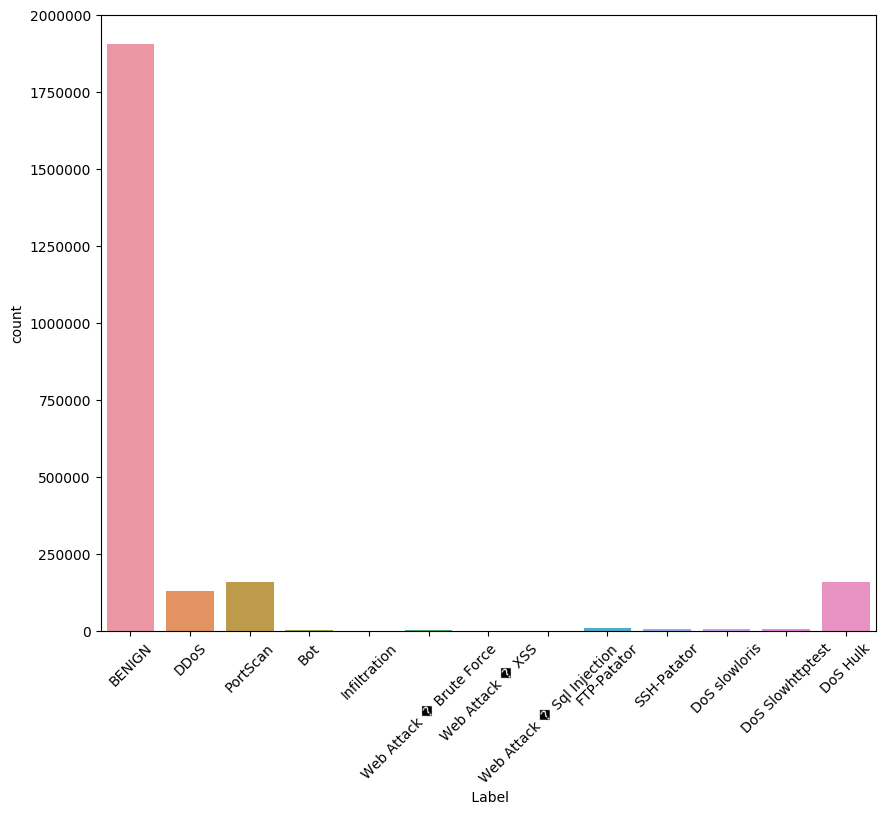

In [14]:
# 查看数据分布
def ClassDistribution(y):
    ax = sns.countplot(y[' Label'],label="Count")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    print(y.groupby(' Label').size())

ClassDistribution(Y)


In [15]:
# 无穷值或者空值处理
import numpy as np
X.fillna(0, inplace=True)
train_X = np.isinf(X)
X[train_X]=0

In [16]:
X.shape

(2379729, 70)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, train_size = 0.8, test_size = 0.2, random_state = 42) #shuffle=False

In [19]:
# 调用模型进行训练，换其他模型改这里就行
xg = xgb.XGBClassifier(n_estimators = 10)
xg.fit(X_train,y_train)
xg_score=xg.score(X_test,y_test)
y_predict=xg.predict(X_test)
y_true=y_test
print('Accuracy of XGBoost: '+ str(xg_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of XGBoost: '+(str(precision)))
print('Recall of XGBoost: '+(str(recall)))
print('F1-score of XGBoost: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

[14:14:21] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


KeyboardInterrupt: 

**以下是降维方法**

**1.0 SelectKBest**

In [20]:
#选择出前k个与标签最相关的特征。
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(f_classif, k=30)
selector.fit(X, Y)

selected_features = X.columns[selector.get_support()]
selected_features

Index([' Flow Duration', 'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', ' Flow IAT Mean',
       ' Flow IAT Std', ' Flow IAT Max', 'Fwd IAT Total', ' Fwd IAT Mean',
       ' Fwd IAT Std', ' Fwd IAT Max', ' Bwd IAT Std', ' Bwd IAT Max',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', 'FIN Flag Count',
       ' PSH Flag Count', ' ACK Flag Count', ' Average Packet Size',
       ' Avg Bwd Segment Size', 'Active Mean', ' Active Max', ' Active Min',
       'Idle Mean', ' Idle Max', ' Idle Min'],
      dtype='object')

**2.0  互信息分类**

In [6]:
import pandas as pd
n = 5000  # 随机选择10行
filename = "X_combine.csv"  # 文件名

data_sample = pd.read_csv(filename)
data_sample = data_sample.sample(n=n)
print(data_sample)

          Destination Port   Flow Duration   Total Fwd Packets  \
164617                 443         5985650                   9   
761000                 443        20136858                   7   
1523794                 88             394                   2   
326926                3324              48                   1   
2227663                 80        84996236                   5   
...                    ...             ...                 ...   
774607               52299              49                   2   
2310318                 80        99831929                   6   
1734649                 53           26577                   1   
2210410                 80       109608548                   4   
702441                 443          207787                   8   

          Total Backward Packets  Total Length of Fwd Packets  \
164617                         9                         2024   
761000                        10                          857   
1523794     

In [7]:
data_sample.shape

(5000, 79)

In [8]:
#统计缺失值数据
data_sample.isnull().sum()
data_sample = data_sample.dropna() 

In [9]:
# 检查每列的值是否相同
to_drop_two= []
for column in data_sample.columns:
    if data_sample[column].nunique() == 1:
        to_drop_two.append(column)

# 删除需要删除的列
data_sample.drop(columns=to_drop_two, inplace=True)


In [11]:
#更新后的数据维度
data_sample.shape

(4999, 71)

In [12]:
data_sample[' Label'].value_counts()

BENIGN                      4016
PortScan                     332
DoS Hulk                     318
DDoS                         262
DoS slowloris                 19
FTP-Patator                   17
DoS Slowhttptest              15
SSH-Patator                   13
Web Attack � Brute Force       4
Bot                            2
Infiltration                   1
Name:  Label, dtype: int64

In [13]:
# 查看数据结构，划分数据
df_two=data_sample
X_two = df_two.loc[:,df_two.columns != " Label"]
Y_two = df_two.loc[:,df_two.columns == " Label"]
print(X_two.shape)
print(Y_two.shape)
# 无穷值或者空值处理
import numpy as np
X_two.fillna(0, inplace=True)
train_X_two = np.isinf(X_two)
X_two[train_X_two]=0
X_two.shape
Y_two.shape



(4999, 70)
(4999, 1)


(4999, 1)

In [14]:
df_two.dtypes

 Destination Port                int64
 Flow Duration                   int64
 Total Fwd Packets               int64
 Total Backward Packets          int64
Total Length of Fwd Packets      int64
                                ...   
Idle Mean                      float64
 Idle Std                      float64
 Idle Max                        int64
 Idle Min                        int64
 Label                          object
Length: 71, dtype: object

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_two[' Label'] = le.fit_transform(df_two[' Label']).astype(np.int64)

In [27]:
#统计
df_two[' Label'].value_counts()


0.0    4016
0.8     332
0.3     318
0.2     262
0.5      19
0.6      17
0.4      15
0.9      13
1.0       4
0.1       2
0.7       1
Name:  Label, dtype: int64

In [17]:
from sklearn.feature_selection import mutual_info_classif
importances = mutual_info_classif(X_two, Y_two)#互信息分类

In [19]:

# Min-max normalization
numeric_features = df_two.dtypes[df_two.dtypes != 'object'].index
df_two[numeric_features] = df_two[numeric_features].apply(
    lambda x: (x - x.min()) / (x.max()-x.min()))
# Fill empty values by 0
df_two = df_two.fillna(0)

'''
# Z-score normalization
numeric_features = df_two.dtypes[df_two.dtypes != 'object'].index
df_two[numeric_features] = df_two[numeric_features].apply(
    lambda x: (x - x.mean()) / (x.std()))
# Fill empty values by 0
df_two = df_two.fillna(0)
'''


"\n# Z-score normalization\nnumeric_features = df_two.dtypes[df_two.dtypes != 'object'].index\ndf_two[numeric_features] = df_two[numeric_features].apply(\n    lambda x: (x - x.mean()) / (x.std()))\n# Fill empty values by 0\ndf_two = df_two.fillna(0)\n"

In [20]:
# calculate the sum of importance scores
#  计算重要性分数的总和
f_list = sorted(zip(map(lambda x: round(x, 4), importances), numeric_features), reverse=True)
Sum = 0
fs = []
for i in range(0, len(f_list)):
    Sum = Sum + f_list[i][0]
    fs.append(f_list[i][1])
    
# select the important features from top to bottom until the accumulated importance reaches 90%
# 从上到下选择重要特征，直到累积重要性达到90%
f_list2 = sorted(zip(map(lambda x: round(x, 4), importances/Sum), numeric_features), reverse=True)
Sum2 = 0
fs = []
for i in range(0, len(f_list2)):
    Sum2 = Sum2 + f_list2[i][0]
    fs.append(f_list2[i][1])
    if Sum2>=0.90:
        break


In [21]:
X_fs = df_two[fs]
X_fs.columns

Index([' Average Packet Size', ' Packet Length Variance',
       ' Packet Length Mean', ' Packet Length Std', ' Subflow Bwd Bytes',
       ' Total Length of Bwd Packets', 'Total Length of Fwd Packets',
       ' Subflow Fwd Bytes', ' Bwd Packet Length Mean',
       ' Avg Bwd Segment Size', ' Init_Win_bytes_backward',
       'Bwd Packet Length Max', 'Init_Win_bytes_forward',
       ' Fwd Packet Length Max', ' Max Packet Length', ' Fwd Header Length.1',
       ' Fwd Header Length', ' Flow IAT Max', ' Bwd Header Length',
       ' Destination Port', ' Flow Duration', ' Fwd IAT Max', 'Fwd IAT Total',
       'Flow Bytes/s', 'Fwd Packets/s', ' Flow Packets/s', ' Bwd Packets/s',
       ' Fwd Packet Length Mean', ' Fwd IAT Mean', ' Avg Fwd Segment Size',
       ' Flow IAT Mean', ' Flow IAT Std', ' Bwd Packet Length Std',
       ' Fwd IAT Std', ' Subflow Bwd Packets', ' Total Backward Packets',
       ' Bwd IAT Max', 'Subflow Fwd Packets', ' Total Fwd Packets',
       'Bwd IAT Total', ' Bwd Packe

In [22]:
len(X_fs.columns)

48

In [23]:
#X_three = df_three.drop([' Label'],axis=1)
#Y_three = df_three[' Label']
#X_train_three, X_test_three, Y_train_three, Y_test_three = train_test_split(X_three,Y_three, train_size = 0.8, test_size = 0.2, random_state = 42) #shuffle=False
X_two = df_two.loc[:,df_two.columns != " Label"]
Y_two = df_two.loc[:,df_two.columns == " Label"]
X_train_two, X_test_two, Y_train_two, Y_test_two = train_test_split(X_two,Y_two, train_size = 0.8, test_size = 0.2, random_state = 42) #shuffle=False

In [26]:
Y_train_two.value_counts()

 Label
0.0       3205
0.8        269
0.3        261
0.2        209
0.5         16
0.6         14
0.4         10
0.9          9
1.0          3
0.1          2
0.7          1
dtype: int64

In [25]:
#调用随机森林模型训练
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
# 定义随机森林模型
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=123)
# 在训练集上拟合模型
train_model_rf = rf_model.fit(X_two, Y_two)
# 计算准确率
print("Score:", rf_model.score(X_two,Y_two))

ValueError: Unknown label type: 'continuous'

3.0

In [54]:
import copy
df_three=copy.deepcopy(df_two)

In [55]:
X_three = df_three.drop([' Label'],axis=1)
Y_three = df_three[' Label']
X_train_three, X_test_three, Y_train_three, Y_test_three = train_test_split(X_three,Y_three, train_size = 0.8, test_size = 0.2, random_state = 42) #shuffle=False

In [56]:
#object编码  train['labels']
'''
from sklearn.preprocessing import LabelEncoder
label_encoding = LabelEncoder()
train['labels'] = label_encoding.fit_transform()
train['protocol_type'] = label_encoding.fit_transform(train['protocol_type'])
train['service'] = label_encoding.fit_transform(train['service'])
train['flag'] = label_encoding.fit_transform(train['flag'])
'''
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_three[' Label'] = le.fit_transform(df_three[' Label']).astype(np.int64)


In [59]:
#编码方式已经改变
df_three[' Label'].dtypes

dtype('int64')

In [60]:
df_three[' Label'].value_counts()


0     80120
3      6735
8      6637
2      5288
6       309
4       244
9       226
5       226
1        85
10       65
11       25
7         2
Name:  Label, dtype: int64

In [61]:
#SMOTE解决类不平衡
pd.Series(df_three[' Label']).value_counts()

0     80120
3      6735
8      6637
2      5288
6       309
4       244
9       226
5       226
1        85
10       65
11       25
7         2
Name:  Label, dtype: int64

In [78]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(n_jobs=-1,sampling_strategy={1:200,10:200,11:200,7:10})

In [77]:
X_three = df_three.drop([' Label'],axis=1)
Y_three = df_three[' Label']
X_train_three, X_test_three, Y_train_three, Y_test_three = train_test_split(X_three,Y_three, train_size = 0.8, test_size = 0.2, random_state = 42) #shuffle=False

In [80]:
#X_train_three, Y_train_three = smote.fit_resample(X_train_three, Y_train_three)

4.0

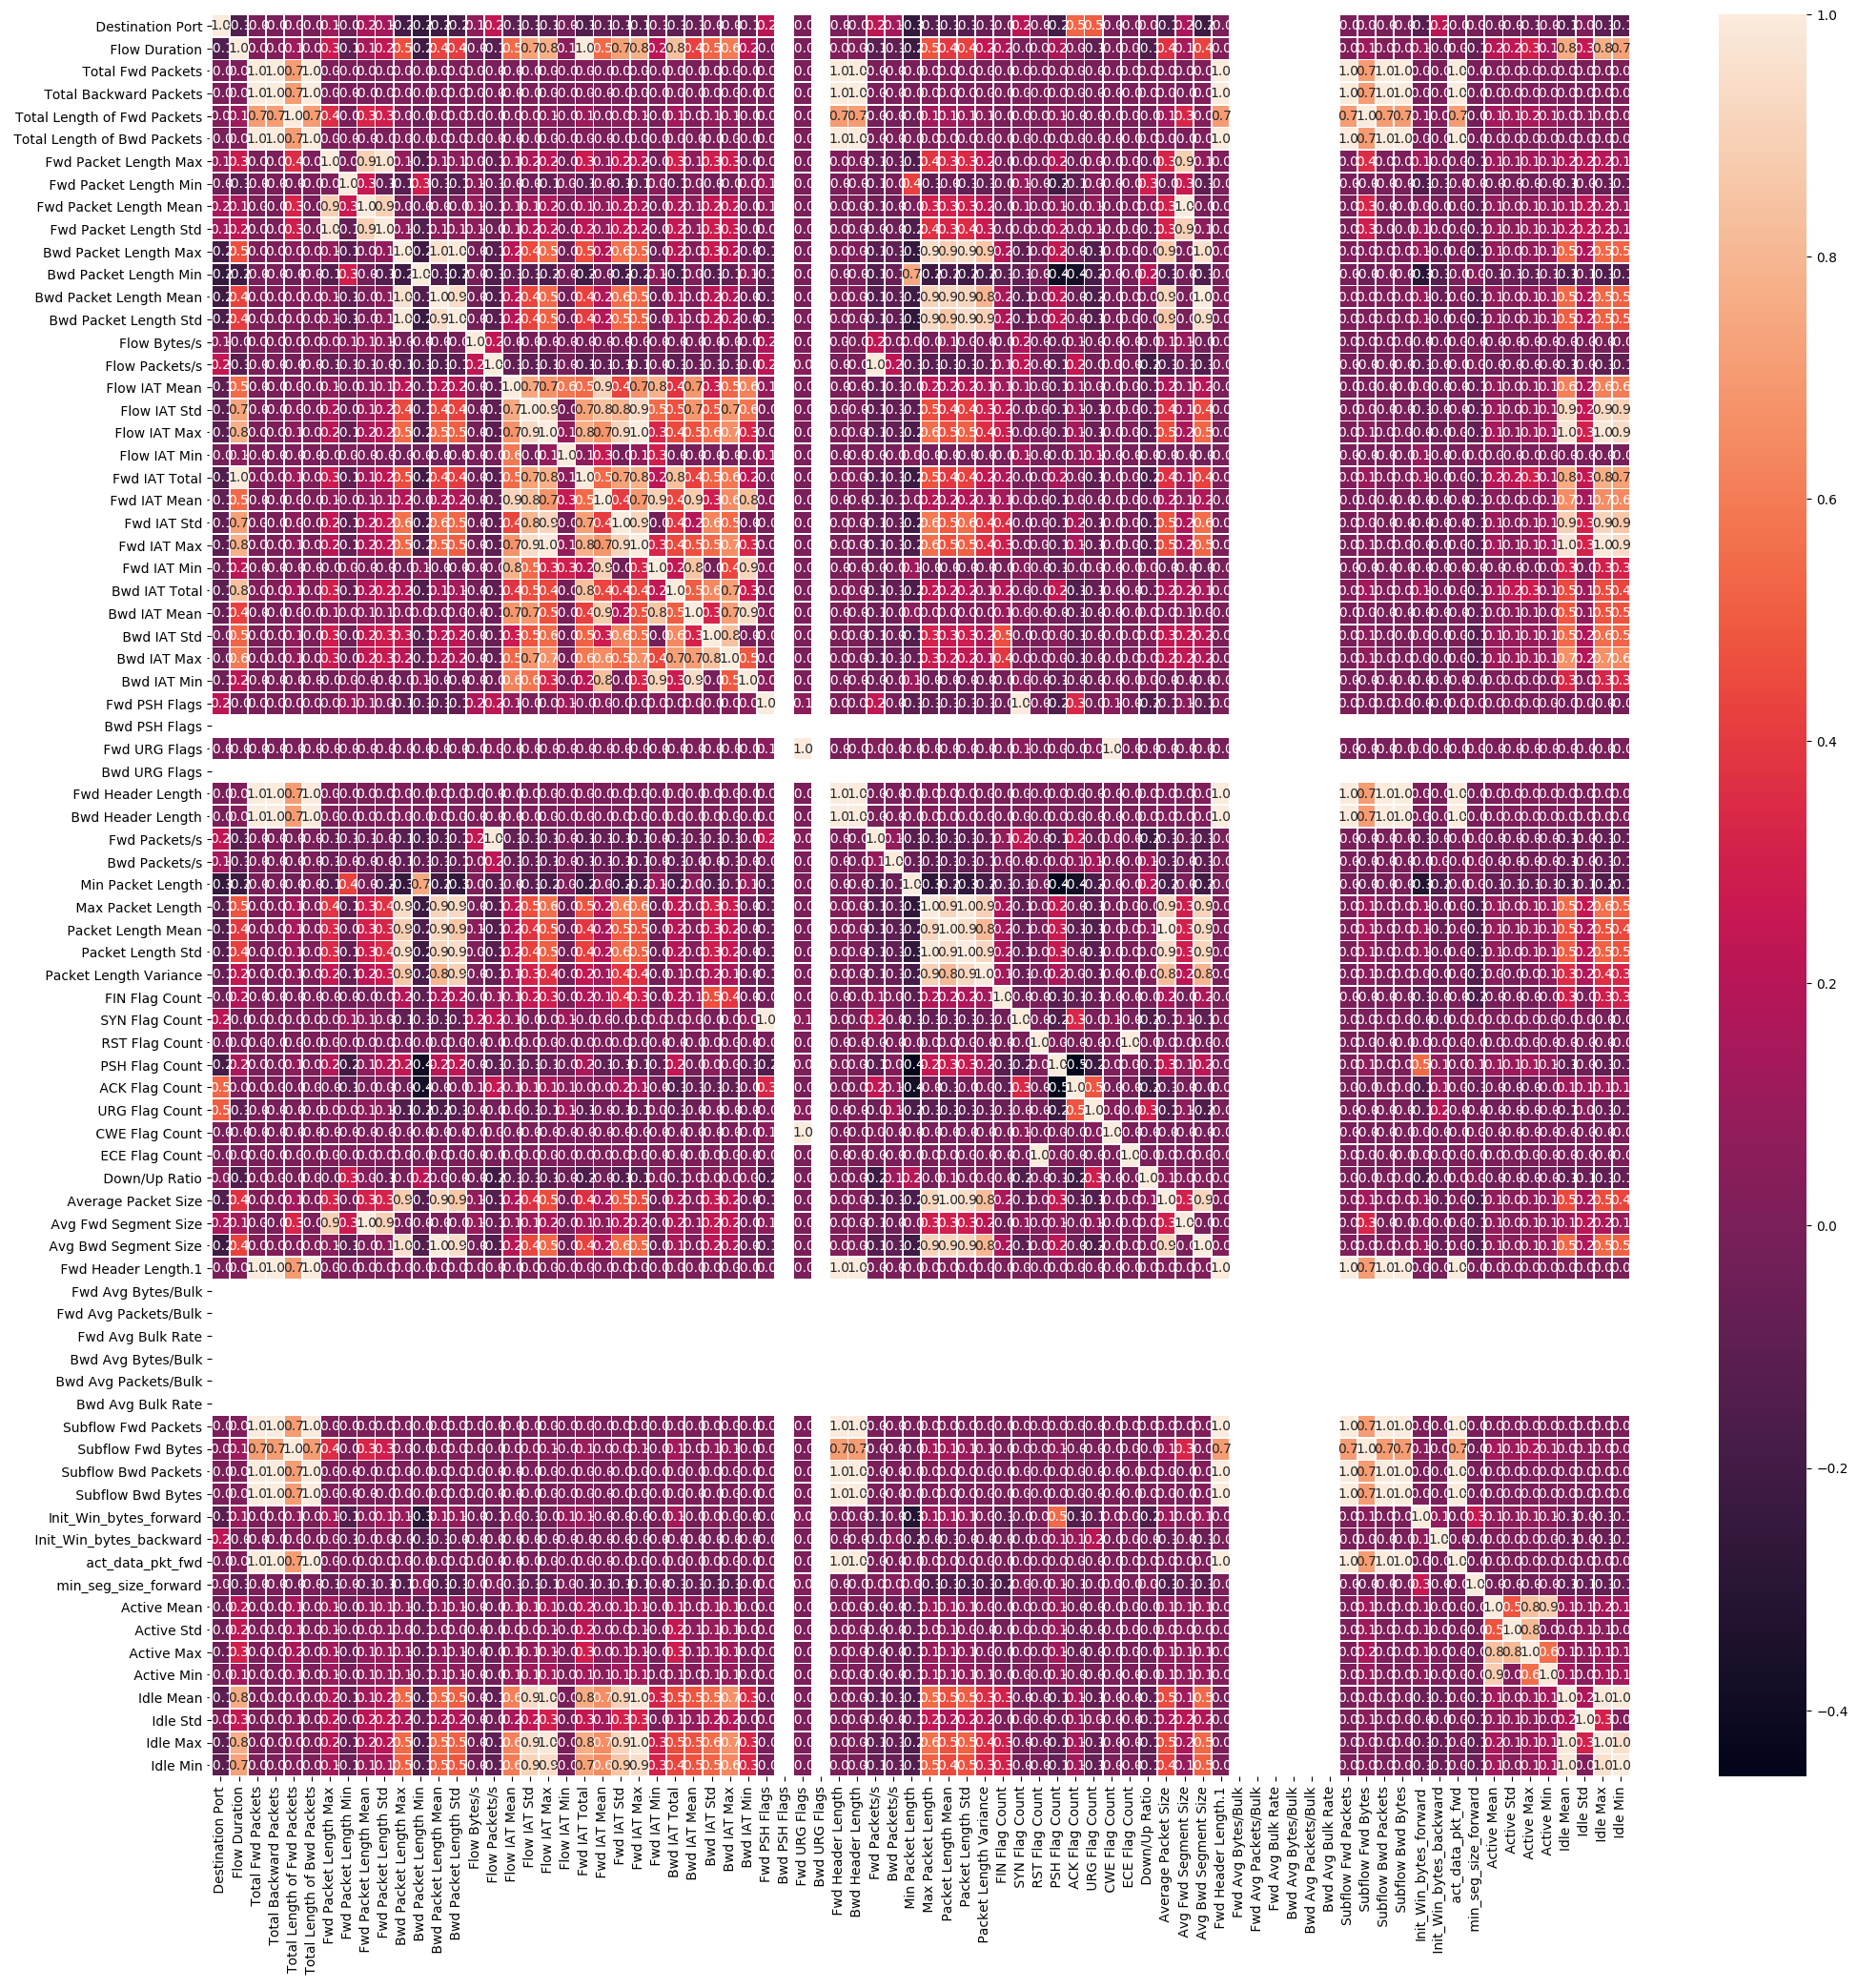

In [10]:
# 热力分析（降维用的，具体不了解）
f,ax = plt.subplots(figsize=(24, 24))
corr = X.corr()
sns.heatmap(corr, annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.savefig('heatmap.png')

In [11]:
import numpy as np

In [12]:
# 降维
columns = np.full((corr.shape[0],), True, dtype=bool)
to_drop = []
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.75:
            if columns[j]:
                columns[j] = False
                to_drop.append((corr.columns)[j])
print('删除高度相关的特征：', to_drop)
X = X.drop(to_drop,axis = 1)
print(X.shape)

删除高度相关的特征： [' Flow IAT Max', 'Fwd IAT Total', ' Fwd IAT Max', 'Bwd IAT Total', 'Idle Mean', ' Idle Max', ' Total Backward Packets', ' Total Length of Bwd Packets', ' Fwd Header Length', ' Bwd Header Length', ' Fwd Header Length.1', 'Subflow Fwd Packets', ' Subflow Bwd Packets', ' Subflow Bwd Bytes', ' act_data_pkt_fwd', ' Subflow Fwd Bytes', ' Fwd Packet Length Mean', ' Fwd Packet Length Std', ' Avg Fwd Segment Size', ' Bwd Packet Length Mean', ' Bwd Packet Length Std', ' Max Packet Length', ' Packet Length Mean', ' Packet Length Std', ' Packet Length Variance', ' Average Packet Size', ' Avg Bwd Segment Size', 'Fwd Packets/s', ' Fwd IAT Mean', ' Fwd IAT Min', ' Fwd IAT Std', ' Idle Min', ' Bwd IAT Mean', ' Bwd IAT Min', ' Bwd IAT Max', ' SYN Flag Count', ' CWE Flag Count', ' ECE Flag Count', ' Active Max', ' Active Min']
(100000, 38)


In [13]:
# 降维
def RemoveMissing(train):
    train_missing = (train.isnull().sum() / len(train)).sort_values(ascending = False)
    #train_missing.head()
    train_missing = train_missing.index[train_missing > 0.75]
    all_missing = list(set(train_missing))
    train.drop(all_missing,axis = 1)
    print('There are %d columns with more than 75%% missing values' % len(all_missing))
    return train
X = RemoveMissing(X)

There are 0 columns with more than 75% missing values


In [14]:
# remove columns with only 1 unique value
# 如果某特征只有一个值，删除该特征
def remove_single_unique_values(dataframe):
    # 得到每一列唯一数值的数量
    cols_to_drop = dataframe.nunique()
    print(cols_to_drop)
    # 得到每一列唯一数值为1个的列标签
    cols_to_drop = cols_to_drop.loc[cols_to_drop.values==1].index
    print(cols_to_drop)
    print('There are %d columns with only 1 unique value' % len(cols_to_drop))
    # 删除唯一数值的特征
    dataframe = dataframe.drop(cols_to_drop,axis=1)
    return dataframe

X = remove_single_unique_values(X)

 Destination Port              12710
 Flow Duration                 53858
 Total Fwd Packets               325
Total Length of Fwd Packets     4266
 Fwd Packet Length Max          2150
 Fwd Packet Length Min           158
Bwd Packet Length Max           2443
 Bwd Packet Length Min           360
Flow Bytes/s                   66773
 Flow Packets/s                58766
 Flow IAT Mean                 56509
 Flow IAT Std                  45040
 Flow IAT Min                  12296
 Bwd IAT Std                   25854
Fwd PSH Flags                      2
 Bwd PSH Flags                     1
 Fwd URG Flags                     2
 Bwd URG Flags                     1
 Bwd Packets/s                 52993
 Min Packet Length               138
FIN Flag Count                     2
 RST Flag Count                    2
 PSH Flag Count                    2
 ACK Flag Count                    2
 URG Flag Count                    2
 Down/Up Ratio                    10
Fwd Avg Bytes/Bulk                 1
 

In [15]:
print(X.shape)

(100000, 30)


In [16]:
# 保存一下处理后的数据
X.to_csv('HandleData_X_processed.csv')

In [17]:

filename = "HandleData_X_processed.csv"  # 文件名

X = pd.read_csv(filename)


In [18]:
X = X.drop(['Unnamed: 0'],axis=1)

In [19]:
print(X.info())
print(Y[" Label"].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 30 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0    Destination Port            100000 non-null  int64  
 1    Flow Duration               100000 non-null  int64  
 2    Total Fwd Packets           100000 non-null  int64  
 3   Total Length of Fwd Packets  100000 non-null  int64  
 4    Fwd Packet Length Max       100000 non-null  int64  
 5    Fwd Packet Length Min       100000 non-null  int64  
 6   Bwd Packet Length Max        100000 non-null  int64  
 7    Bwd Packet Length Min       100000 non-null  int64  
 8   Flow Bytes/s                 99962 non-null   float64
 9    Flow Packets/s              100000 non-null  float64
 10   Flow IAT Mean               100000 non-null  float64
 11   Flow IAT Std                100000 non-null  float64
 12   Flow IAT Min                100000 non-null  int64  
 13  

In [20]:
print(Y[' Label'].unique())

['BENIGN' 'PortScan' 'DoS Hulk' 'DDoS' 'FTP-Patator' 'SSH-Patator'
 'DoS Slowhttptest' 'DoS slowloris' 'Bot' 'Web Attack � Brute Force'
 'Web Attack � XSS' 'Infiltration' 'Web Attack � Sql Injection']


In [21]:
# 对Label进行编码
Y[' Label'].replace(to_replace=['BENIGN',
                'PortScan',
                'DDoS',
                'DoS slowloris',
                'DoS Slowhttptest',
                'DoS Hulk',
                'DoS GoldenEye',
                'Heartbleed',
                'FTP-Patator',
                'SSH-Patator',
                'Web Attack � Brute Force',
                'Web Attack � XSS',
                'Web Attack � Sql Injection',
                'Infiltration',
                'Bot'], 
            value=[ 0
                    ,1
                    ,2
                    ,3
                    ,4
                    ,5
                    ,6
                    ,7
                    ,8
                    ,9
                    ,10
                    ,11
                    ,12
                    ,13
                    ,14],
            inplace=True)

In [22]:
print(Y[' Label'].unique())

[ 0  1  5  2  8  9  4  3 14 10 11 13 12]


In [23]:
print(Y.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 1508220 to 1410243
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0    Label  100000 non-null  int64
dtypes: int64(1)
memory usage: 4.0 MB
None


In [24]:
# 无穷值或者空值处理
X.fillna(0, inplace=True)
train_X = np.isinf(X)
X[train_X]=0

In [25]:
print(train_X.columns)

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       'Total Length of Fwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Min', ' Bwd IAT Std',
       'Fwd PSH Flags', ' Fwd URG Flags', ' Bwd Packets/s',
       ' Min Packet Length', 'FIN Flag Count', ' RST Flag Count',
       ' PSH Flag Count', ' ACK Flag Count', ' URG Flag Count',
       ' Down/Up Ratio', 'Init_Win_bytes_forward', ' Init_Win_bytes_backward',
       ' min_seg_size_forward', 'Active Mean', ' Active Std', ' Idle Std'],
      dtype='object')


In [26]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 30 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0    Destination Port            100000 non-null  int64  
 1    Flow Duration               100000 non-null  int64  
 2    Total Fwd Packets           100000 non-null  int64  
 3   Total Length of Fwd Packets  100000 non-null  int64  
 4    Fwd Packet Length Max       100000 non-null  int64  
 5    Fwd Packet Length Min       100000 non-null  int64  
 6   Bwd Packet Length Max        100000 non-null  int64  
 7    Bwd Packet Length Min       100000 non-null  int64  
 8   Flow Bytes/s                 100000 non-null  float64
 9    Flow Packets/s              100000 non-null  float64
 10   Flow IAT Mean               100000 non-null  float64
 11   Flow IAT Std                100000 non-null  float64
 12   Flow IAT Min                100000 non-null  int64  
 13  

In [27]:
X.columns

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       'Total Length of Fwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Min', ' Bwd IAT Std',
       'Fwd PSH Flags', ' Fwd URG Flags', ' Bwd Packets/s',
       ' Min Packet Length', 'FIN Flag Count', ' RST Flag Count',
       ' PSH Flag Count', ' ACK Flag Count', ' URG Flag Count',
       ' Down/Up Ratio', 'Init_Win_bytes_forward', ' Init_Win_bytes_backward',
       ' min_seg_size_forward', 'Active Mean', ' Active Std', ' Idle Std'],
      dtype='object')

In [37]:
# 调用模型进行训练，换其他模型改这里就行
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='entropy', max_depth=12, min_samples_leaf=1, splitter="best")
trained_model = clf.fit(X,Y)
print("Score:", trained_model.score(X,Y))

Score: 0.998452575470549


In [ ]:
#调用SVM模型训练
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
# 建立模型
model_svc = SVC(kernel='linear')
#训练模型
train_model_svc = model_svc.fit(X,Y)
# 计算准确率
print("Score:", train_model_svc.score(X,Y))

In [49]:
#调用随机森林模型训练
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
# 定义随机森林模型
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=123)
# 在训练集上拟合模型
train_model_rf = rf_model.fit(X, Y)
# 计算准确率
print("Score:", rf_model.score(X,Y))

Score: 0.9672470208717494


In [28]:
#调用KNN模型训练
from sklearn.neighbors import KNeighborsClassifier
# 创建一个 KNN 分类器对象
knn_model = KNeighborsClassifier(n_neighbors=3)
# 在训练集上拟合模型
train_model_knn = knn_model.fit(X, Y)
# 计算准确率
print("Score:", knn_model.score(X,Y))

Score: 0.98823


In [ ]:
#神经网络
from sklearn.neural_network import MLPClassifier


In [38]:
# 模型保存
import pickle
with open('clf.pickle','wb')as f: 
    pickle.dump(clf,f)
# 模型加载
with open('clf.pickle', 'rb') as f:
   clf2 = pickle.load(f)

In [50]:
# 随机森林模型保存
import pickle
with open('rf.pickle','wb')as f: 
    pickle.dump(rf_model,f)
# 模型加载
with open('rf.pickle', 'rb') as f:
   rf_model2 = pickle.load(f)

In [29]:
# knn模型保存
import pickle
with open('knn.pickle','wb')as f: 
    pickle.dump(knn_model,f)
# 模型加载
with open('knn.pickle', 'rb') as f:
   knn_model2 = pickle.load(f)

In [45]:
# 读取待预测数据
mydata0 = pd.read_csv('Mydata/202211280951-ens224.pcap_Flow.csv', low_memory = False,encoding='gbk')
mydata2 = pd.read_csv('Mydata/20221128-10.19.2.20-0-ens224.pcap_Flow.csv', low_memory = False,encoding='gbk')
mydata3 = pd.read_csv('Mydata/20221128-10.19.2.20-1-ens224.pcap_Flow.csv', low_memory = False,encoding='gbk')
mydata4 = pd.read_csv('Mydata/20221128-10.19.2.20-2-ens224.pcap_Flow.csv', low_memory = False,encoding='gbk')
mydata5 = pd.read_csv('Mydata/20221128-10.19.2.20-3-ens224.pcap_Flow.csv', low_memory = False,encoding='gbk')
mydata6 = pd.read_csv('Mydata/20221128-10.19.2.20-4-ens224.pcap_Flow.csv', low_memory = False,encoding='gbk')
mydata7 = pd.read_csv('Mydata/20221128-10.19.3.44-0-ens224.pcap_Flow.csv', low_memory = False,encoding='gbk')
mydata8 = pd.read_csv('Mydata/20221128-10.19.3.44-1-ens224.pcap_Flow.csv', low_memory = False,encoding='gbk')
mydata9 = pd.read_csv('Mydata/20221128-10.19.3.44-2-ens224.pcap_Flow.csv', low_memory = False,encoding='gbk')
mydata10 = pd.read_csv('Mydata/202211280943.pcap_Flow.csv', low_memory = False,encoding='gbk')

mydata1= pd.concat([mydata0,mydata2,mydata3,mydata4,mydata5,mydata6,mydata7,mydata8,mydata9,mydata10])
mydata1.to_csv('Y_combine.csv')
#mydata1 = mydata1.rename(columns={' act data pkt fwd':'Fwd Act Data Pkts'})
print(mydata1.info())
X_test = mydata1.loc[:,mydata1.columns != " Label"]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23022 entries, 0 to 1513
Data columns (total 84 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Flow ID                      23022 non-null  object 
 1   Src IP                       23022 non-null  object 
 2   Src Port                     23022 non-null  int64  
 3   Dst IP                       23022 non-null  object 
 4    Destination Port            23022 non-null  int64  
 5   Protocol                     23022 non-null  int64  
 6   Timestamp                    23022 non-null  object 
 7    Flow Duration               23022 non-null  int64  
 8    Total Backward Packets      23022 non-null  int64  
 9   Tot Bwd Pkts                 23022 non-null  int64  
 10  Total Length of Fwd Packets  23022 non-null  float64
 11  TotLen Bwd Pkts              23022 non-null  float64
 12   Fwd Packet Length Max       23022 non-null  float64
 13   Fwd Packet Lengt

In [46]:
X_fs.columns

Index([' Average Packet Size', ' Packet Length Mean', ' Packet Length Std',
       ' Packet Length Variance', ' Total Length of Bwd Packets',
       'Total Length of Fwd Packets', ' Subflow Fwd Bytes',
       ' Subflow Bwd Bytes', ' Bwd Packet Length Mean',
       ' Avg Bwd Segment Size', 'Init_Win_bytes_forward',
       ' Init_Win_bytes_backward', 'Bwd Packet Length Max',
       ' Max Packet Length', ' Fwd Packet Length Max', ' Fwd Header Length.1',
       ' Fwd Header Length', ' Flow IAT Max', ' Destination Port',
       ' Flow Duration', ' Bwd Header Length', ' Fwd IAT Max', 'Flow Bytes/s',
       'Fwd IAT Total', ' Bwd Packets/s', 'Fwd Packets/s', ' Flow Packets/s',
       ' Fwd IAT Mean', ' Flow IAT Mean', ' Fwd Packet Length Mean',
       ' Avg Fwd Segment Size', ' Subflow Bwd Packets', ' Flow IAT Std',
       ' Bwd Packet Length Std', ' Total Backward Packets', ' Fwd IAT Std',
       'Subflow Fwd Packets', ' Total Fwd Packets', 'Bwd IAT Total',
       ' Bwd IAT Max', ' Bwd Packe

In [57]:
# 训练时用到的特征值
imps = [' Average Packet Size', 
        ' Packet Length Mean', 
        ' Packet Length Std',
       ' Packet Length Variance', 
       ' Total Length of Bwd Packets',
       'Total Length of Fwd Packets', 
       ' Subflow Fwd Bytes',
       ' Subflow Bwd Bytes', 
       ' Bwd Packet Length Mean',
       ' Avg Bwd Segment Size',
        'Init_Win_bytes_forward',
       ' Init_Win_bytes_backward',
        'Bwd Packet Length Max',
       ' Max Packet Length', 
       ' Fwd Packet Length Max',
        ' Fwd Header Length.1',
       ' Fwd Header Length', 
       ' Flow IAT Max', 
       ' Destination Port',
       ' Flow Duration',
        ' Bwd Header Length', 
        ' Fwd IAT Max',
         'Flow Bytes/s',
       'Fwd IAT Total', 
       ' Bwd Packets/s', 
       'Fwd Packets/s', 
       ' Flow Packets/s',
       ' Fwd IAT Mean', 
       ' Flow IAT Mean', 
       ' Fwd Packet Length Mean',
       ' Avg Fwd Segment Size', ' Subflow Bwd Packets', ' Flow IAT Std',
       ' Bwd Packet Length Std', ' Total Backward Packets', ' Fwd IAT Std',
       'Subflow Fwd Packets', ' Total Fwd Packets', 'Bwd IAT Total',
       ' Bwd IAT Max', ' Bwd Packet Length Min', ' Fwd Packet Length Std',
       ' Bwd IAT Mean', ' min_seg_size_forward', ' Bwd IAT Min',
       ' act_data_pkt_fwd', ' Fwd IAT Min', ' Min Packet Length', 'Idle Mean']

In [31]:
# 取出对应特征值的数据并且进行处理
X_test = X_test.loc[:, X.columns]
test_X = np.isinf(X_test)
X_test[test_X]=0
X_test.fillna(0, inplace=True)

KeyError: "Passing list-likes to .loc or [] with any missing labels is no longer supported. The following labels were missing: Index([' Total Fwd Packets'], dtype='object'). See https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike"

In [59]:
print(X_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23022 entries, 0 to 1513
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0    Destination Port            23022 non-null  int64  
 1    Flow Duration               23022 non-null  int64  
 2    Total Backward Packets      23022 non-null  int64  
 3   Total Length of Fwd Packets  23022 non-null  float64
 4    Fwd Packet Length Max       23022 non-null  float64
 5    Fwd Packet Length Min       23022 non-null  float64
 6   Bwd Packet Length Max        23022 non-null  float64
 7    Bwd Packet Length Min       23022 non-null  float64
 8   Flow Bytes/s                 23022 non-null  float64
 9    Flow Packets/s              23022 non-null  float64
 10   Flow IAT Mean               23022 non-null  float64
 11   Flow IAT Min                23022 non-null  float64
 12   Bwd IAT Std                 23022 non-null  float64
 13  Fwd PSH Flags    

In [60]:
X_test.columns

Index([' Destination Port', ' Flow Duration', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Min', ' Bwd IAT Std', 'Fwd PSH Flags',
       'Fwd Act Data Pkts', ' Fwd URG Flags', ' Bwd Packets/s',
       'FIN Flag Count', ' RST Flag Count', ' PSH Flag Count',
       ' ACK Flag Count', ' URG Flag Count', ' Down/Up Ratio',
       'Init_Win_bytes_forward', ' Init_Win_bytes_backward',
       ' min_seg_size_forward', 'Active Mean', ' Active Std', ' Idle Std'],
      dtype='object')

In [61]:
# 预测
y_pred = knn_model.predict(X_test)

In [62]:
print(y_pred)

[1 0 0 ... 0 0 0]


In [63]:
# 查看数据种类
ydata1_1 = pd.DataFrame(y_pred)
print(ydata1_1[0].unique())

[ 1  0  5  8  2  9  3 14]


In [64]:
label_name = ['BENIGN',
                'PortScan',
                'DDoS',
                'DoS slowloris',
                'DoS Slowhttptest',
                'DoS Hulk',
                'DoS GoldenEye',
                'Heartbleed',
                'FTP-Patator',
                'SSH-Patator',
                'Web Attack � Brute Force',
                'Web Attack � XSS',
                'Web Attack � Sql Injection',
                'Infiltration',
                'Bot']

In [65]:
# 对编码后的标签值进行还原
ydata1_0 = pd.DataFrame(ydata1_1)
mydata1['Label'] = ydata1_0
mydata1['Label'].replace(to_replace=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], value=label_name, inplace=True)
print(mydata1['Label'].unique())

['PortScan' 'BENIGN' 'DoS Hulk' 'FTP-Patator' 'DDoS' 'SSH-Patator'
 'DoS slowloris' 'Bot']


0
0     21048
1       337
2       379
3         7
5       722
8       356
9       165
14        8
dtype: int64


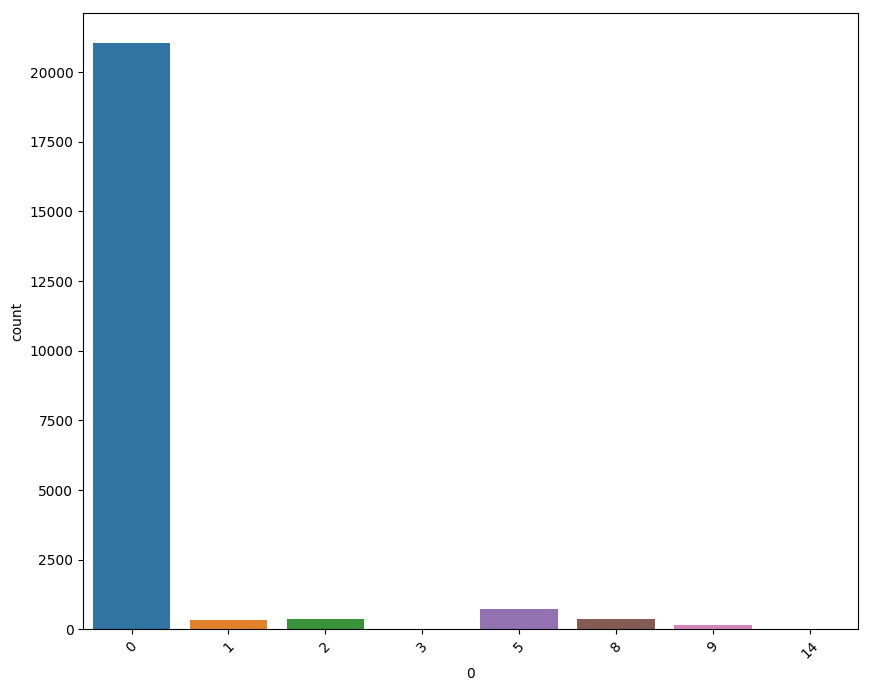

In [66]:
# 查看分布
def ClassDistribution(y):
    ax = sns.countplot(y[0],label="Count")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    print(y.groupby(0).size())

ClassDistribution(ydata1_1)